In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import numpy as np
import pypianoroll
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [69]:
from music_generator.models import DivideAndComposeBidirectional, MultiSongModel
from music_generator.data import fetching_instrument_pianorolls
from music_generator.midi import play_pianoroll, plot_pianoroll, create_multitrack

In [70]:
files = glob.glob('../**/*.npz', recursive=True)

In [71]:
def average_velocity(roll):
    return np.mean(roll)/roll.shape[0]

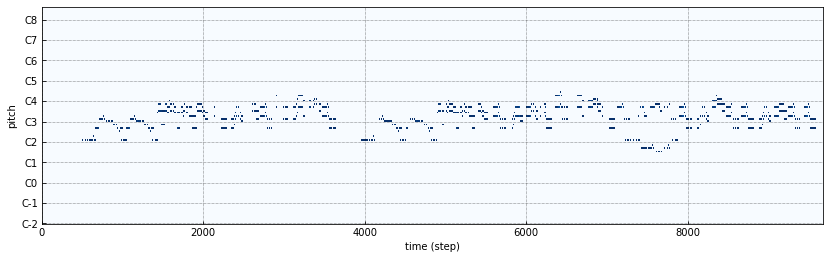

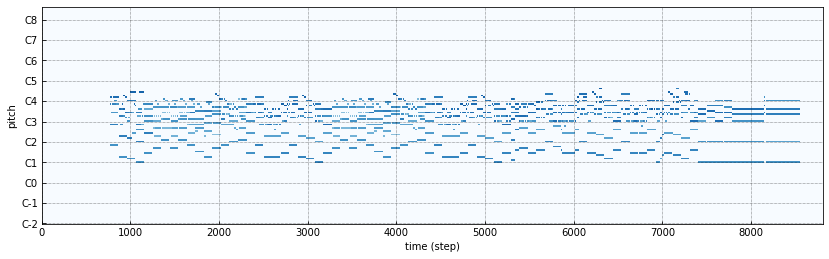

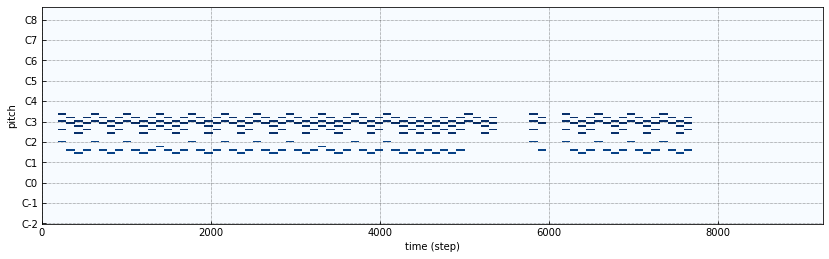

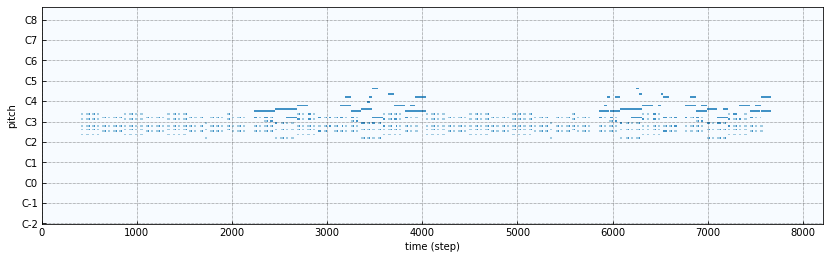

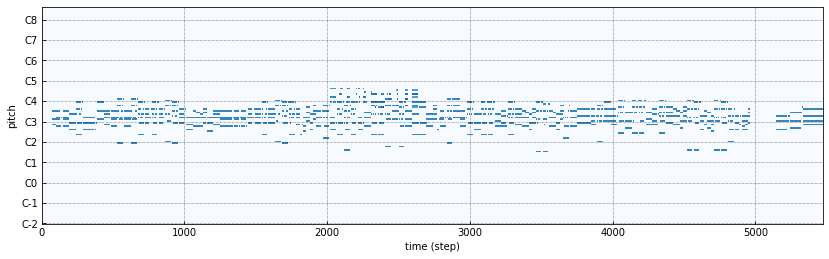

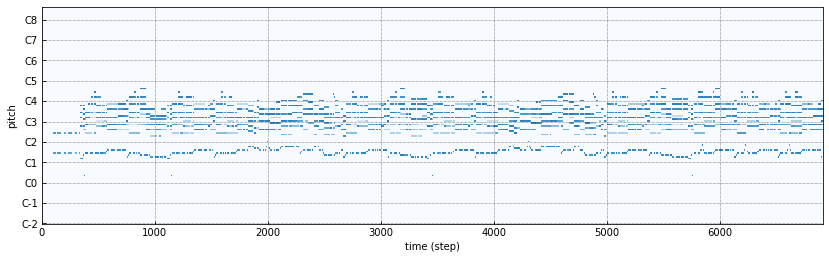

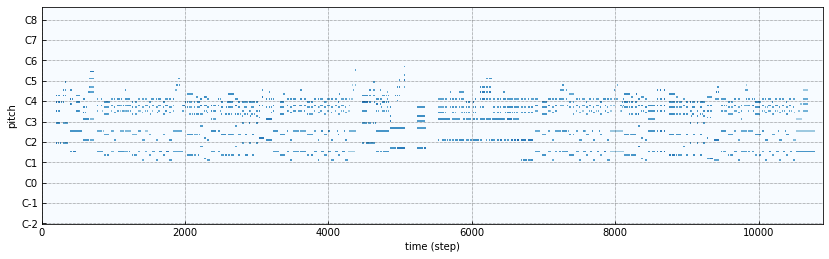

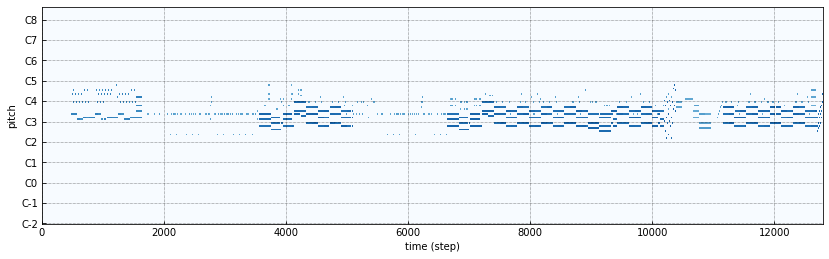

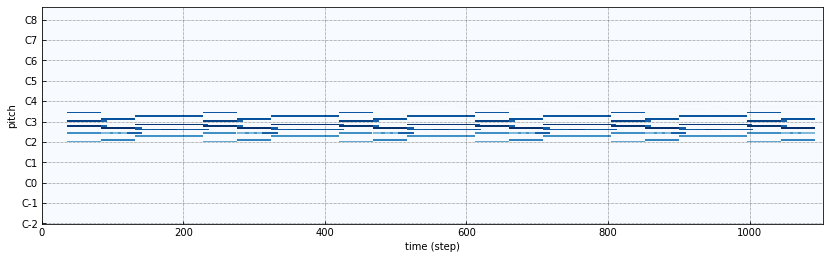

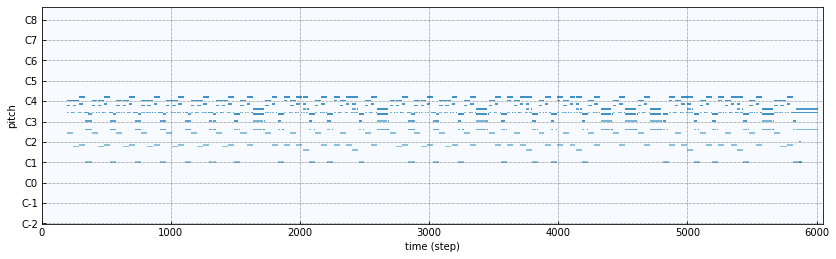

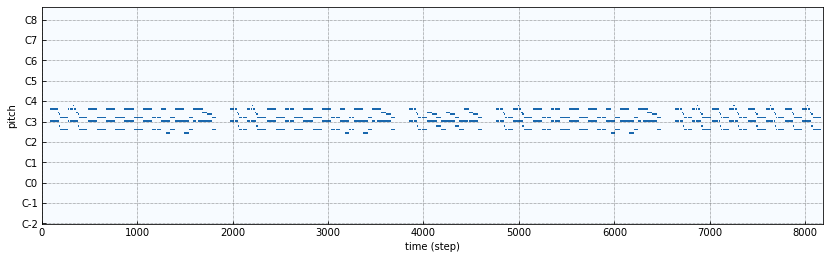

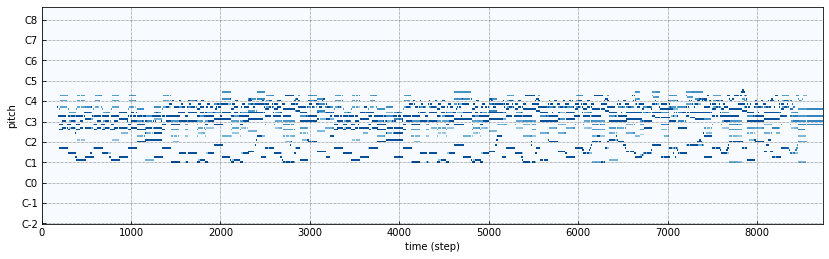

In [72]:
multitracks = [pypianoroll.load(fp) for fp in files[40:80]]
tracks = fetching_instrument_pianorolls(multitracks, 'Piano')
tracks = [t for t in tracks if average_velocity(t) > 0.0001]
for track in tracks:
    plot_pianoroll(track)

In [80]:
model = MultiSongModel(tracks)

In [81]:
model.init_model()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 192, 128)          32896     
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 192, 1024)         1180672   
                                                                 
 dense_12 (Dense)            (None, 192, 1024)         1049600   
                                                                 
 dense_13 (Dense)            (None, 192, 512)          524800    
                                                                 
 dense_14 (Dense)            (None, 192, 128)          65664     
                                                                 
Total params: 2,853,632
Trainable params: 2,853,632
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.fit()

Epoch 1/300
13/13 [==============================] - 9s 629ms/step - loss: 188.5638 - val_loss: 262.1168
Epoch 2/300


KeyboardInterrupt: 

In [ ]:
song = model.continueRoll(2, intro_roll=model.X[4:5])
model.plot(song)

In [ ]:
model.mtrack = multitracks[20]
model.play(song)